## Learning to Read, Write and Think in Pyro

### Recursive functions that terminate their recursion stochastically

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
cd ..

/Users/Suriyadeepan/talks/in.pycon.2019


In [1]:
import pyro
import pyro.distributions as pdist
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

[Geometric Distribution](#)

> The probability distribution of the number $X$ of Bernoulli trials needed to get one success

- Write a model for geometric distribution that uses recursion and terminates recursion stochastically

In [ ]:
def geometric(p, t=0):
    pass

geometric_samples = [ geometric(0.5) for _ in range(10000) ]

In [ ]:
plt.hist(geometric_samples)

### Can we recover $p$ from the geometric distribution?

## ...

### Can we learn $p$ from data generated by a bernoulli distribution?

In [2]:
p = 0.3
data = pdist.Bernoulli(p).sample([1000, ])

def model(data):
    p = pyro.sample('p', pdist.Uniform(0., 1.))
    with pyro.plate('observe_data'):
        pyro.sample('obs', pdist.Bernoulli(p), obs=data)

In [7]:
import getorix.inference as getinf

trace, posterior = getinf.nuts_fit(model, data,num_samples=1000, warmup_steps=300,
                                  var_names=['p'])

Sample: 100%|██████████| 1300/1300 [00:06<00:00, 187.43it/s, step size=1.13e+00, acc. prob=0.891]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1295a9b90>],
      dtype=object)

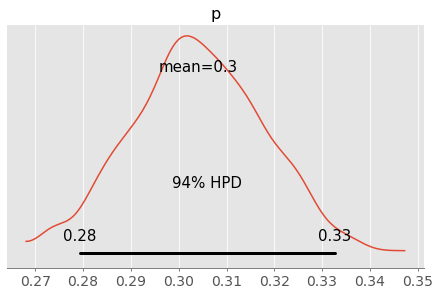

In [9]:
import arviz as az

az.plot_posterior(trace, ['p'])

> There is 94% probability that `p` lies between 0.28 and 0.33

(array([696.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 304.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

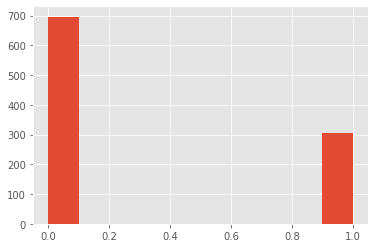

In [11]:
plt.hist(data.detach())

In [18]:
def posterior_predictive(posterior):
    p = posterior['p'].sample().item()
    return pdist.Bernoulli(p).sample().item()

(array([726.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 274.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

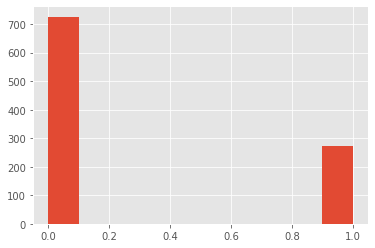

In [19]:
plt.hist([ posterior_predictive(posterior) for _ in range(1000) ])

## Variational Inference

## ...

In [39]:
def bernoulli_beta_model(data):
    p = pyro.sample('p', pdist.Beta(12., 2.))
    with pyro.plate('observe_data'):
        pyro.sample('obs', pdist.Bernoulli(p), obs=data)

def bernoulli_beta_guide(data):
    a = pyro.param('a', torch.tensor(12.))
    b = pyro.param('b', torch.tensor(2.))
    pyro.sample('p', pdist.Beta(a, b))

- Demonstrate inference using SVI

In [40]:
import torch
import pyro
import pyro.distributions as pdist

pyro.clear_param_store()
losses, params = getinf.variational_fit(
    bernoulli_beta_model, bernoulli_beta_guide, data, lr=0.01, num_epochs=5000)

100%|██████████| 5000/5000 [00:09<00:00, 524.76it/s]


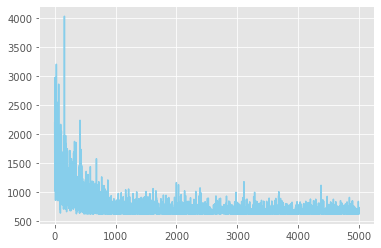

In [41]:
getviz.plot(losses)

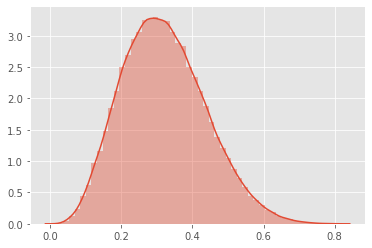

In [47]:
import seaborn as sns

sns.distplot(pdist.Beta(params['a'], params['b']).sample([100000, ]).detach())

- Recover `p=0.7` from Binomial distributed data
- Recover `p=0.2` from Geometric distributed data